In [1]:
#Initialisation
% pylab inline
from poppy.creatures import PoppyErgoJr
poppy = PoppyErgoJr()

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


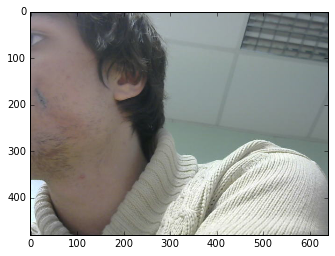

In [2]:
#Affichage d'une image basique
%pylab inline 
import cv2
import matplotlib.pyplot as plt

img=poppy.camera.frame
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


Populating the interactive namespace from numpy and matplotlib
1 visage(s) trouve(s)!


`%matplotlib` prevents importing * from pylab and numpy


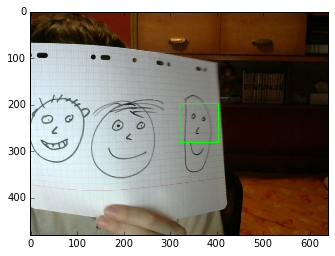

In [15]:
#Reconnaissance faciale
%pylab inline 
import cv2
import matplotlib.pyplot as plt

chemin='/home/poppy/miniconda/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(chemin)

image = poppy.camera.frame
 
#Passer en niveaux de gris :
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(70, 70),
    flags = cv2.CASCADE_SCALE_IMAGE
    )
 
print "{0} visage(s) trouve(s)!".format(len(faces))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
 

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    

In [38]:
for m in poppy.motors:
    m.compliant = True
    
    
 


In [33]:
a=30
for i in range(0,5):
            a=-1*a
            poppy.m4.goto_position(0+a, 0.5, wait=True)
            poppy.m4.goto_position(0, 1, wait=True)

In [31]:
a=30
for i in range(0,2):
            a=-1*a
            poppy.m1.goto_position(a, 1, wait=True)

Populating the interactive namespace from numpy and matplotlib
0 visage(s) trouve(s)!
0 visage(s) trouve(s)!
1 visage(s) trouve(s)!


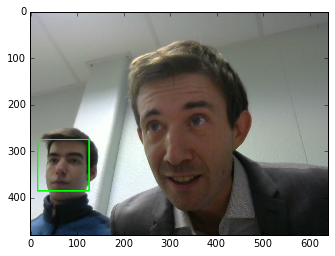

In [3]:
#Reconnaissance avec coucou
%pylab inline
 
import cv2
import time
 
import matplotlib.pyplot as plt
 
for m in poppy.motors:
    m.compliant = False
    m.led = 'red'
 
pos_1 = {'m1': 0, 'm2': 0, 'm3': 70, 'm4': 0, 'm5': -70, 'm6': 30}
poppy.goto_position(pos_1, 1, wait=True)
 

chemin='/home/poppy/miniconda/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(chemin)
 
#Boucle principale:
Play=True
while Play :
    
    image = poppy.camera.frame
     
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(70, 70),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
 

    print "{0} visage(s) trouve(s)!".format(len(faces))
 
 
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
 

    if len(faces)>0:
        
        for m in poppy.motors:
            m.led = 'green'
 
        #Poppy dit Bonjour!
        poppy.m5.goto_position(-50, 1, wait=False)
        a=30
        for i in range(0,5):
            a=-1*a
            poppy.m4.goto_position(0+a, 0.5, wait=True)
            poppy.m4.goto_position(0, 1, wait=True)
 
       
        for m in poppy.motors:
            m.led = 'off'
       
        Play=False
 
   
    else:
        #Il fait semblant de chercher
        a=30
        for i in range(0,2):
            a=-1*a
            poppy.m1.goto_position(a, 1, wait=True)
 
    #On attend avant une nouvelle photo:
    time.sleep(2)
 
#Une fois la boucle terminee, on affiche la dernière image pour verifier:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [3]:
for m in poppy.motors:
    m.compliant= True